In [74]:
import pandas as pd
import datetime as dt
import numpy as np
import calendar
import csv
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython import display
from ipywidgets import interact,widgets
import re
import csv
import string
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.diagnostics import performance_metrics
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import r2_score
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
'''
stores = pd.read_csv(r"C:\Users\WorkStation\PythonDocs\Sandwich Analytics\AppWichStoreAttributes.csv")
data = pd.read_csv(r"file:///C:/Users/WorkStation/PythonDocs/Sandwich Analytics/weekly_sales_10stores.csv")
'''


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 26-27: truncated \UXXXXXXXX escape (<ipython-input-3-9ea62bdc0bb2>, line 4)

In [2]:
# For Linux Machine
stores = pd.read_csv("/home/hp/Documents/PythonDocs/Sandwich Analytics/AppWichStoreAttributes.csv")
data = pd.read_csv("/home/hp/Documents/PythonDocs/Sandwich Analytics/weekly_sales_10stores.csv")



In [3]:
data['Date'] = pd.to_datetime(data['Year'].astype(str) + 
                              '-' + data['Month'].astype(str).str.zfill(2) + 
                              '-'+ data['Day'].astype(str).str.zfill(2))

In [4]:
data.rename(columns={'Stores_num': 'Stores_Num'},inplace=True)
data.columns

Index(['INV_NUMBER', 'Store_Num', 'Description', 'Price', 'Sold', 'Del',
       'Sales', 'Tot_Sls', 'Unit_Cost', 'Cost', 'Cost_Percent', 'Margin',
       'Profit', 'Date', 'Year', 'Month', 'Day'],
      dtype='object')

In [8]:
data['Weekday'] = data['Date'].dt.day_name()

In [9]:
data = pd.merge(data,stores,on=['Store_Num'],how='left')

In [10]:
data.drop(['Store_Weather_Station','Store_Competition_Fastfood','Store_Competition_Otherfood','Store_Traveller_Clients','Store_Minority_Clients'],axis=1,inplace=True)
data.columns
data.dtypes

INV_NUMBER                       int64
Store_Num                        int64
Description                     object
Price                          float64
Sold                             int64
Del                              int64
Sales                          float64
Tot_Sls                        float64
Unit_Cost                      float64
Cost                           float64
Cost_Percent                   float64
Margin                         float64
Profit                         float64
Date                    datetime64[ns]
Year                             int64
Month                            int64
Day                              int64
Weekday                         object
Store_Name                      object
Store_City                      object
Store_County                    object
Store_State                     object
Store_Location                  object
Store_Drive_Through             object
Store_Near_School               object
Annual_Rent_Estimate     

In [11]:
data['Store_Drive_Through'] = data['Store_Drive_Through'].astype(bool)
data['Store_Near_School'] = data['Store_Near_School'].astype(bool)
data.columns

Index(['INV_NUMBER', 'Store_Num', 'Description', 'Price', 'Sold', 'Del',
       'Sales', 'Tot_Sls', 'Unit_Cost', 'Cost', 'Cost_Percent', 'Margin',
       'Profit', 'Date', 'Year', 'Month', 'Day', 'Weekday', 'Store_Name',
       'Store_City', 'Store_County', 'Store_State', 'Store_Location',
       'Store_Drive_Through', 'Store_Near_School', 'Annual_Rent_Estimate'],
      dtype='object')

In [12]:
data.dtypes

INV_NUMBER                       int64
Store_Num                        int64
Description                     object
Price                          float64
Sold                             int64
Del                              int64
Sales                          float64
Tot_Sls                        float64
Unit_Cost                      float64
Cost                           float64
Cost_Percent                   float64
Margin                         float64
Profit                         float64
Date                    datetime64[ns]
Year                             int64
Month                            int64
Day                              int64
Weekday                         object
Store_Name                      object
Store_City                      object
Store_County                    object
Store_State                     object
Store_Location                  object
Store_Drive_Through               bool
Store_Near_School                 bool
Annual_Rent_Estimate     

In [13]:
df_org = pd.read_csv("/home/hp/Documents/PythonDocs/Sandwich Analytics/dataclean1.csv")
df_org.columns  = ['inv_number', 'store_num', 'description', 'price', 'sold', 'del', 'sales', 'tot_sls', 'unit_cost', 'cost', 'cost_percent', 'margin', 'profit', 'date', 'year', 'month', 'day', 'weekday', 'store_name','store_city', 'store_county', 'store_state', 'store_location','store_drive_through', 'store_near_school', 'annual_rent_estimate','year_month']
df_org['year_month'] = pd.to_datetime(df_org['date']).dt.to_period('M')
df_org['date'] = pd.to_datetime(df_org['date'])
df_org.dtypes
df_org.to_csv("/home/hp/Documents/PythonDocs/Sandwich Analytics/dataclean1.csv" , index = False)

In [14]:
df_copy = df_org.copy()
store_list = df_copy.store_num.unique()

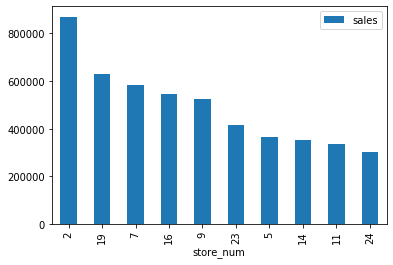

In [15]:
df_copy_cat = df_copy[['store_num', 'sales', 'store_location']]
df_copy_cat = df_copy_cat.groupby(['store_num', 'store_location']).sales.sum()
df_copy_cat = df_copy_cat.reset_index().set_index('store_num')
df_copy_cat.sort_values(by = 'sales',ascending = False).plot(kind = 'bar')

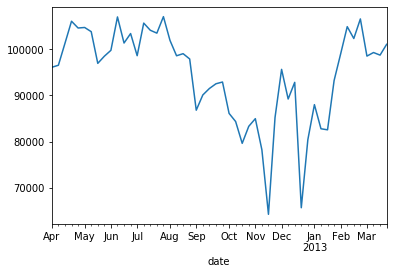

In [16]:
sales_byweek = df_copy.groupby('date').sales.sum()
sales_byweek.plot()

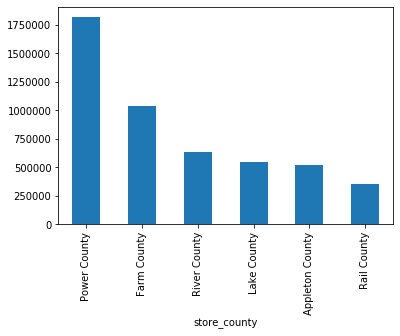

In [17]:
county_sales = df_copy.groupby('store_county').sales.sum()
county_sales.sort_values(ascending = False).plot(kind='bar')

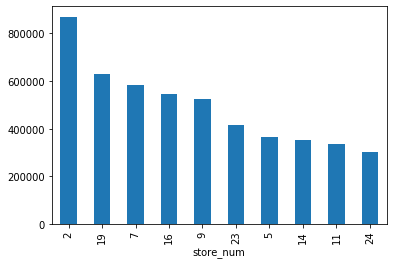

In [18]:
store_sales = df_copy.groupby('store_num').sales.sum()
store_sales.sort_values(ascending = False).plot(kind='bar')

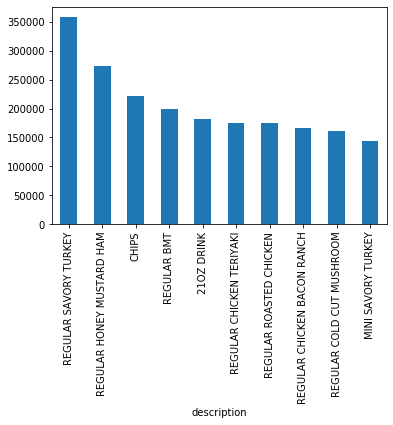

In [19]:
best_seller = df_copy.groupby('description').sales.sum().sort_values(ascending=False).head(10)
best_seller.plot(kind='bar')

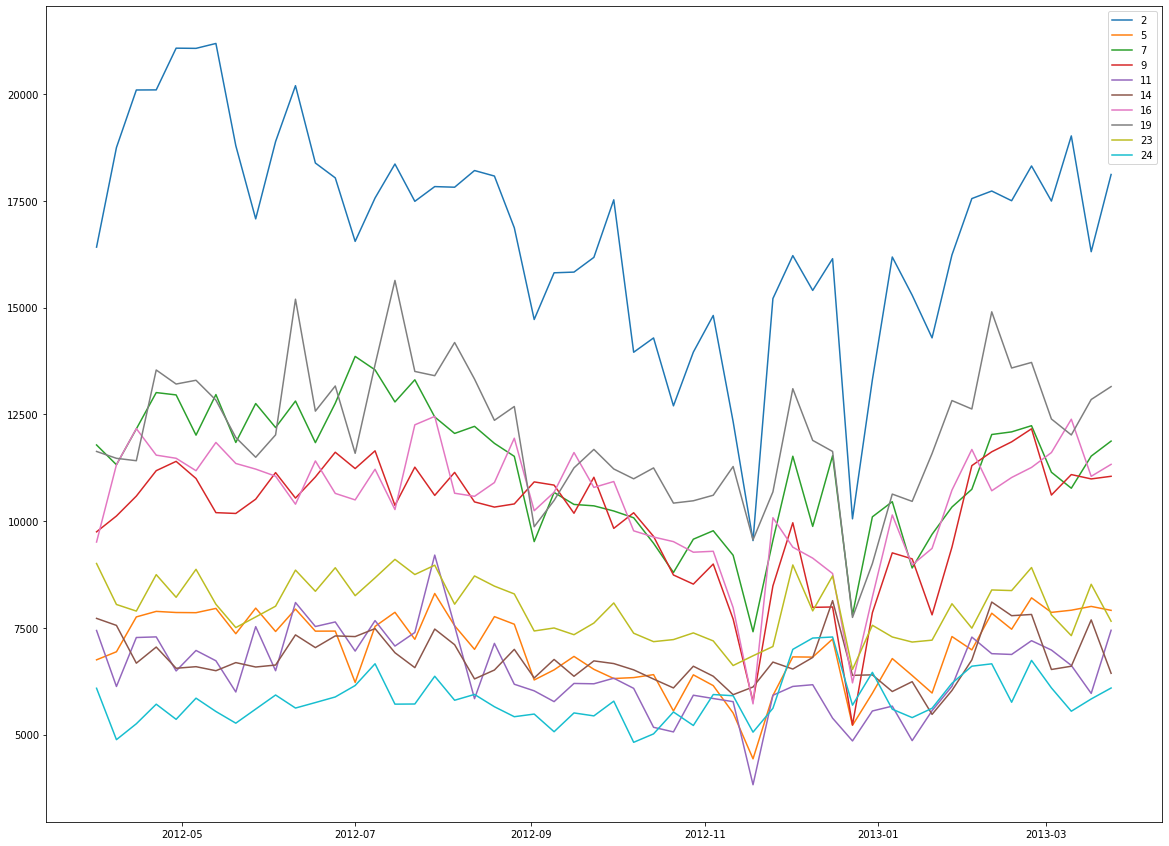

In [20]:
#Plotting of sales of the stores over time.
store_sales = df_copy.groupby(['date','store_num']).sales.sum()
store_sales = store_sales.reset_index()
store_sales
plt.figure(figsize=(20,15))
for i in store_list:
    plt.plot(store_sales[store_sales.store_num == i].date , store_sales[store_sales.store_num == i].sales)
    plt.legend(store_sales.store_num)


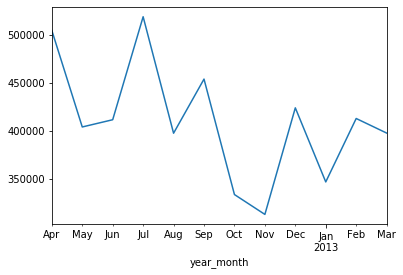

In [21]:
# Plot sales over time
df_copy.groupby('year_month').sales.sum().plot(kind='line')

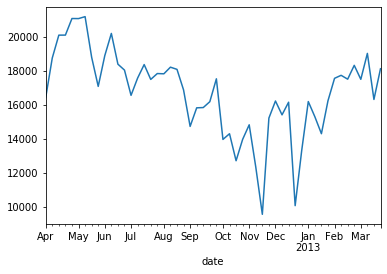

In [21]:
# Plot sales of best performing store over time.
df_copy[df_copy.store_num == 2].groupby('date').sales.sum().plot(kind = 'line')

In [22]:
# plotting sales for the year by week. Observe that sales only in the weeks
# 2012-08-05 (all except #24 operational) and 2012-08-08 (all expect #24 non-operational)
# 2012-04-29 (all except #7 operational) and 2012-04-28 (all expect #7 non-operational)

# These stores were operational in a staggered manner, perhaps for renovations.
# Dates for these stores were adjusted to ensure no empty rows.

sales_byweek_df = pd.DataFrame(sales_byweek)
df_copy.groupby('date').store_num.unique()

date
2012-04-01    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
2012-04-08    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
2012-04-15    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
2012-04-22    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
2012-04-29    [7, 2, 5, 9, 11, 14, 16, 19, 23, 24]
2012-05-06    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
2012-05-13    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
2012-05-20    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
2012-05-27    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
2012-06-03    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
2012-06-10    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
2012-06-17    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
2012-06-24    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
2012-07-01    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
2012-07-08    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
2012-07-15    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
2012-07-22    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
2012-07-29    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
2012-08-05    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
2012-08-12    [2, 5, 7, 9,

In [23]:
pivotted = df_copy.pivot_table(index = 'date' , columns = 'description' , values = 'sales',aggfunc = 'sum')
df_copy_week_description = pd.DataFrame(pivotted.fillna(0).to_records())
df_copy_week_description = pd.merge(df_copy_week_description , sales_byweek_df , on = 'date')
df_copy_week_description.set_index('date',inplace = True)
df_copy_week_description.shape

(52, 503)

In [24]:
#Strategy to use correlation matrix to reduce the number of dimension or features in the dataframe. NOT USED. MENTOR ASKED TO USE FEATURE HASHER....
corr_matrix = df_copy_week_description.corr().abs()
corr_matrix
corr_items = corr_matrix[(corr_matrix['sales']>0.75) & (corr_matrix['sales']<1.0)].index
df_copy_week_description_corritems = pd.merge(df_copy_week_description[corr_items],sales_byweek_df,on='date')
df_copy_week_description_corritems.columns = ['21oz drink', '30oz drink', '40oz beverage', 'chips','coke 20oz bottle', 'regular chicken teriyaki', 'regular spicy italian','regular turkey/ham/roastbeef', 'ss bottled water', 'sales']
df_copy_week_description_corritems

,21oz drink,30oz drink,40oz beverage,chips,coke 20oz bottle,regular chicken teriyaki,regular spicy italian,regular turkey/ham/roastbeef,ss bottled water,sales
date,,,,,,,,,,
2012-04-01,3925.44,1934.72,1448.00,4244.24,980.15,4207.70,2205.70,2502.40,330.04,96102.04
2012-04-08,3897.28,1958.89,1389.40,4428.60,1391.23,3586.10,2266.60,2461.60,471.45,96540.13
2012-04-15,3566.72,1947.00,1354.40,4501.09,1129.05,4634.35,2396.80,2338.40,410.54,101279.39
2012-04-22,4302.32,2328.34,1717.60,5006.48,1305.28,4403.00,2449.30,2661.60,549.50,106062.34
2012-04-29,4348.48,2202.48,1624.00,4828.12,1146.56,4535.30,2429.70,2827.20,486.48,104596.05
2012-05-06,4236.80,2267.43,1704.40,4881.25,1327.51,4432.40,2456.30,2894.40,529.92,104708.57
2012-05-13,4301.76,2290.72,1856.00,4646.07,1206.61,4340.00,2388.40,2807.20,593.07,103803.59
2012-05-20,3822.08,2140.46,1412.00,4244.79,1049.46,4026.40,2055.20,2339.20,415.65,96951.21
2012-05-27,4266.40,2039.56,1655.90,4390.59,1110.01,3779.30,2401.00,2536.00,471.28,98491.96


In [24]:
# Define your dependent variables and target variable
df_copy_week_description = df_copy_week_description.reset_index().drop('date',axis=1)

In [25]:
X = df_copy_week_description.loc[:,df_copy_week_description.columns != 'sales']
y = df_copy_week_description.sales

# Scale the data.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Though 36 components explain the variation, Cannot use 36 since the test dataset has 16 observations 
# and cannot have 36 features to predict using 16 observatins. Hence using 16 n_components
pca = PCA(n_components = 16)
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(data = X_pca, columns = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8',
                                                  'PCA9','PCA10','PCA11','PCA12','PCA13','PCA14','PCA15','PCA16'])
X_pca_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16
0,9.252904,-2.394842,8.106233,-0.929888,0.378147,-1.880057,-0.898346,-3.174661,-5.374973,3.716222,-8.286764,5.176042,-0.123030,2.698345,-2.584102,-0.436767
1,9.535030,-3.792141,7.943508,-1.023384,0.790499,-6.261097,5.229862,0.988137,-5.023202,0.724194,-3.313971,7.213056,0.497371,-1.673940,7.127755,-0.190222
2,10.595799,-6.430604,11.171426,0.758858,0.953146,-4.245946,-0.882263,-5.882140,-1.667510,-0.842670,-6.287807,-2.187374,-5.578509,-5.097436,-3.824160,-0.855252
3,14.015658,-6.307735,16.117478,1.506005,0.135185,-7.616873,6.712919,-5.113814,7.916976,4.661952,8.288300,-3.572672,3.450528,1.999634,0.638823,1.344143
4,10.286878,-2.295294,7.471593,1.755615,-5.278599,8.544269,-3.102557,1.127373,8.347634,-8.012596,-0.309461,2.343790,-7.796441,0.005069,-4.557356,-5.962594
5,11.765029,-0.088216,3.976738,1.250504,-3.151361,5.908653,-1.045633,8.409279,3.682925,-2.775308,5.660323,8.578826,0.342108,0.341055,-1.554648,8.490947
6,10.417029,-0.049314,4.965993,0.295406,-2.467748,4.457892,-1.461555,4.382142,-1.116772,3.629806,-2.147313,-6.780512,9.592334,2.731940,-7.599167,1.213253
7,9.330535,-3.723032,4.228130,2.454810,-6.024395,8.999594,-4.191558,10.162610,-3.729921,3.920573,-3.126572,-4.993605,0.156220,0.108498,8.052178,-3.261879
8,6.809399,1.120074,-1.502823,-0.305745,-1.509099,2.155598,-2.419849,0.350287,-0.439199,2.696672,1.901715,-4.866632,-1.138953,-0.854485,0.822552,1.051601
9,7.792630,0.333675,-4.743831,-5.981574,-1.492607,5.615927,-6.914980,-7.745828,1.272825,8.464161,2.952567,0.622086,-5.713943,2.522054,5.028342,6.371997


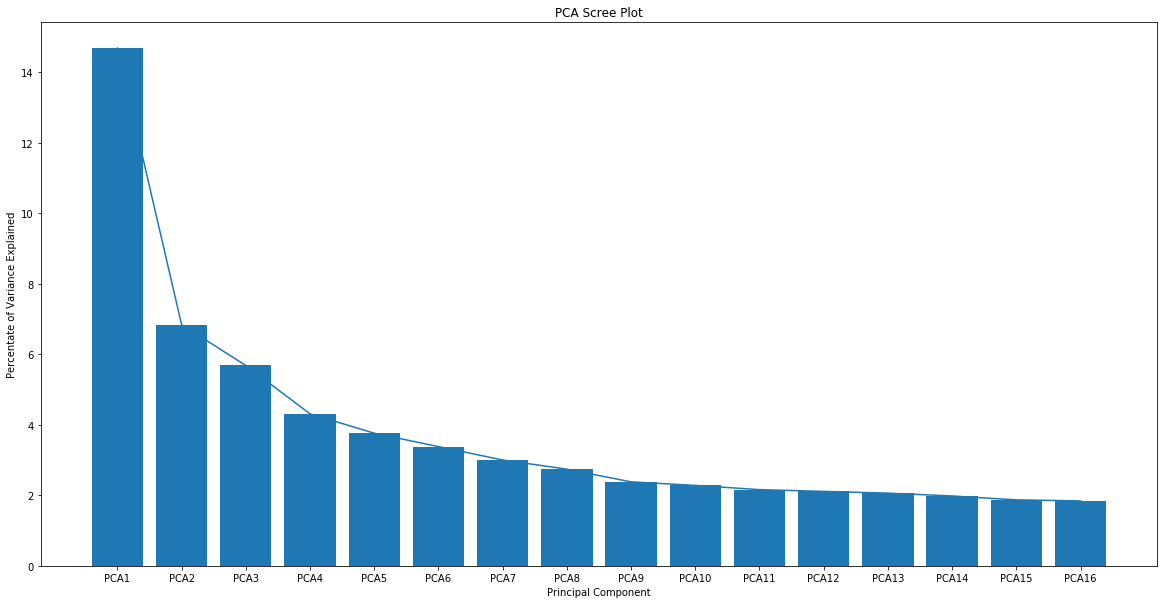

In [26]:
# A scree plot is like a bar chart showing the size of each of the principal components. 
# It helps us to visualize the percentage of variation captured by each of the principal components.
# source: https://www.kindsonthegenius.com/2019/01/12/principal-components-analysispca-in-python-step-by-step/

plt.figure(figsize=(20,10))
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals = 2)
columns = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8',
           'PCA9','PCA10','PCA11','PCA12','PCA13','PCA14','PCA15','PCA16']
plt.bar(x = columns, height= percent_variance)
plt.plot(percent_variance)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

Text(0.5, 0, 'Principal Components')

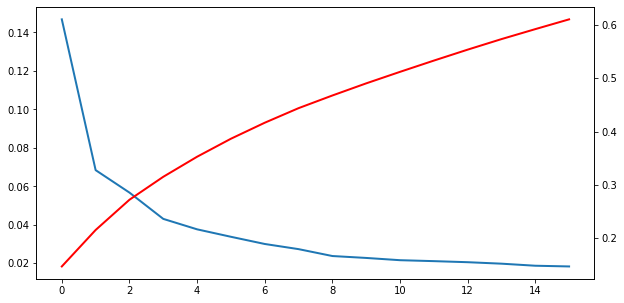

In [27]:
# to be run with pca. n_components = 'None' to find out how many n_components  need to be run
# In any case we can use only 16 components


plt.figure(figsize= (10,5))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
ax1.plot(pca.explained_variance_ratio_[:500], linewidth = 2)
ax2.plot(pca.explained_variance_ratio_.cumsum()[:300], linewidth = 2, color = 'r')
plt.xlabel('Principal Components')





In [28]:
pca.explained_variance_ratio_.sum()

0.6104489760009053

In [35]:
#Train Test Split with DATA for SCALED DATA only with no PCA dimension reduction since LR and RFR 
# do not work with scaled PCA transformed data.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
X_train.shape,y_train.shape,X_test.shape, y_test.shape



# Run Linear Regression ########################
lr_model = LinearRegression()
lr_model.fit(X_train , y_train)
y_lr_pred = lr_model.predict(X_test)
r2_score(y_test , y_lr_pred)

0.9027591089192092

In [38]:
# Run polynomial regression

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
X_train.shape,y_train.shape,X_test.shape, y_test.shape

'''
polynomial_features = PolynomialFeatures(degree = 16)
X_poly = polynomial_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly,y_train)
y_poly_predict = poly_model.predict(X_test)
poly_model.score(X_test , y_test)
'''




'\npolynomial_features = PolynomialFeatures(degree = 16)\nX_poly = polynomial_features.fit_transform(X_train)\npoly_model = LinearRegression()\npoly_model.fit(X_poly,y_train)\ny_poly_predict = poly_model.predict(X_test)\npoly_model.score(X_test , y_test)\n'

In [41]:
# Try Feature hashing for feature extraction.....
'''
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape,y_train.shape,X_test.shape, y_test.shape

from sklearn.feature_extraction import FeatureHasher
hasher = FeatureHasher(n_features = 16)
f = hasher.transform(X_train)
f

AttributeError: 'str' object has no attribute 'items'

In [44]:
# Run Random FOrrest Regressor.
# Works only with SCALED DATA and not with PCA (Dimension reduced data) i.e. tried using X_pca_df

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
X_train.shape,y_train.shape,X_test.shape, y_test.shape

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)
param_distributions = {'n_estimators': [100,150,200,300],
        'max_depth': [2,3,5,6,7,8,9, None]}
rnd_for_rgr = RandomizedSearchCV(estimator = rfr,
                          param_distributions = param_distributions,
                          cv = 5, n_jobs = -1)
rnd_for_rgr.fit(X_train,y_train)
rnd_for_rgr.best_params_

{'n_estimators': 150, 'max_depth': 9}

In [50]:
rafor = RandomForestRegressor(n_estimators = 150, max_depth=9,random_state=42)
rafor.fit(X_train,y_train)
pr = rafor.predict(X_test)
print('Random Forest Regressor Result:')
print('RMSE: ',sqrt(mean_squared_error(y_test,pr , squared = False)))
print('R2: ',r2_score(y_test,pr))


Random Forest Regressor Result:
RMSE:  55.5692567160773
R2:  0.8733079245776878


In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
X_train.shape,y_train.shape,X_test.shape, y_test.shape

import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          nthread = 4,
                          seed=42)
parameters = {
    'max_depth':range(2,10,1),
    'n_estimators':range(60,220,40),
    'learning_rate': [0.1,0.01,0.05]
}

grid_search = GridSearchCV(
    estimator=xg_reg,
    param_grid=parameters,
    scoring = 'r2',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_search.fit(X_train, y_train)
                          

# source: https://www.mikulskibartosz.name/xgboost-hyperparameter-tuning-in-python-using-grid-search/
# Python XGB Examples: https://github.com/dmlc/xgboost/tree/master/demo/guide-python
# Another example of Grid Searc CV: https://www.kaggle.com/phunter/xgboost-with-gridsearchcv
#                                 : https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost


Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.3s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    9.4s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   22.0s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:   33.1s
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed:   42.2s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estim...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    seed=42, subsample=None, tree_method=None,
                                    validate_parameters=False, ver

In [55]:
print('Best Parameters for XGB are: ',grid_search.best_params_ )


Best Parameters for XGB are:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 180}


In [58]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          nthread = 4,
                          seed=42)
parameters = {
    'max_depth': [3],
    'n_estimators': [180],
    'learning_rate': [0.05]
}

grid_search = GridSearchCV(
    estimator=xg_reg,
    param_grid=parameters,
    scoring = 'r2',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

print('XGB model R2 Score: ', r2_score(y_test,y_pred))


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.5s remaining:    2.0s


XGB model R2 Score:  0.9267696783118051


[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.9s finished


In [69]:
# Using Time Series Split and Grid Search CV to train the 


import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
X_train.shape,y_train.shape,X_test.shape, y_test.shape

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          nthread = 4,
                          seed=42)
parameters = {
    'max_depth':range(2,10,1),
    'n_estimators':range(60,220,40),
    'learning_rate': [0.1,0.01,0.05]
}

tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(
    estimator=xg_reg,
    param_grid=parameters,
    scoring = 'r2',
    n_jobs = 10,
    cv = tscv,
    verbose=True
)

grid_search.fit(X_train, y_train)

print('XGB Regressor with TSS, best parameters: ', grid_search.best_params_)

      
      
# Source: 
# https://stackoverflow.com/questions/46732748/how-do-i-use-a-timeseriessplit-with-a-gridsearchcv-object-to-tune-a-model-in-sci

'''
It turns out the problem was I was using GridSearchCV from sklearn.grid_search, which is deprecated. Importing GridSearchCV from sklearn.model_selection resolved the problem:

import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import numpy as np
X = np.array([[4, 5, 6, 1, 0, 2], [3.1, 3.5, 1.0, 2.1, 8.3, 1.1]]).T
y = np.array([1, 6, 7, 1, 2, 3])

model = xgb.XGBRegressor()
param_search = {'max_depth' : [3, 5]}

tscv = TimeSeriesSplit(n_splits=2)
gsearch = GridSearchCV(estimator=model, cv=tscv,
                        param_grid=param_search)
gsearch.fit(X, y)
gives:

GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x11ab4abf8>,
       error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)
'''

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 260 tasks      | elapsed:    9.1s


XGB Regressor with TSS, best parameters:  {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 180}


[Parallel(n_jobs=10)]: Done 480 out of 480 | elapsed:   16.6s finished


"\nIt turns out the problem was I was using GridSearchCV from sklearn.grid_search, which is deprecated. Importing GridSearchCV from sklearn.model_selection resolved the problem:\n\nimport xgboost as xgb\nfrom sklearn.model_selection import TimeSeriesSplit, GridSearchCV\nimport numpy as np\nX = np.array([[4, 5, 6, 1, 0, 2], [3.1, 3.5, 1.0, 2.1, 8.3, 1.1]]).T\ny = np.array([1, 6, 7, 1, 2, 3])\n\nmodel = xgb.XGBRegressor()\nparam_search = {'max_depth' : [3, 5]}\n\ntscv = TimeSeriesSplit(n_splits=2)\ngsearch = GridSearchCV(estimator=model, cv=tscv,\n                        param_grid=param_search)\ngsearch.fit(X, y)\ngives:\n\nGridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x11ab4abf8>,\n       error_score='raise',\n       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,\n       learning_rate=0.1, max_delta_step=0, max_depth=3,\n       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,\n       objective='reg:linear', reg_alph

In [66]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          nthread = 4,
                          seed=42)
parameters = {
    'max_depth':[2],
    'n_estimators':[180],
    'learning_rate': [0.05]
}

tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(
    estimator=xg_reg,
    param_grid=parameters,
    scoring = 'r2',
    n_jobs = 10,
    cv = tscv,
    verbose=True
)

grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
print('XGB Regressor RMSE with TSS: ',mean_squared_error(y_test , y_pred , squared = False))
print('XGB Regressor R2 Score with TSS: ',r2_score(y_test,y_pred))



Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


XGB Regressor RMSE with TSS:  2376.4603227026055
XGB Regressor R2 Score with TSS:  0.9249635576478293


[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    0.3s finished


In [70]:
# Pivot data to create data with date as index

pivotted = df_copy.pivot_table(index = 'date' , columns = 'description' , values = 'sales',aggfunc = 'sum')
df_copy_week_description_date = pd.DataFrame(pivotted.fillna(0).to_records())
df_copy_week_description_date = pd.merge(df_copy_week_description_date , sales_byweek_df , on = 'date')
df_copy_week_description_date.set_index('date',inplace = True)

In [71]:
X = df_copy_week_description_date.loc[:,df_copy_week_description_date.columns != 'sales']
y = df_copy_week_description_date.sales

# Scale the data.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Though 36 components explain the variation, Cannot use 36 since the test dataset has 16 observations 
# and cannot have 36 features to predict using 16 observatins. Hence using 16 n_components
pca = PCA(n_components = 16)
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(data = X_pca, index= X.index  , columns = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8',
                                                  'PCA9','PCA10','PCA11','PCA12','PCA13','PCA14','PCA15','PCA16'])
X_pca_df = pd.merge(X_pca_df , y, how = 'left', on = 'date').reset_index()

In [73]:
X_pca_df.rename(columns = {'date':'ds', 'sales':'y'}, inplace = True)

In [76]:
#To do multivariate time series forecasting in Prophet, you need to follow these steps:
# https://stackoverflow.com/questions/54544285/is-it-possible-to-do-multivariate-multi-step-forecasting-using-fb-prophet#

prophet_model = Prophet(interval_width = 0.95)
prophet_model.add_regressor('PCA1')
prophet_model.add_regressor('PCA2')
prophet_model.add_regressor('PCA3')
prophet_model.add_regressor('PCA4')
prophet_model.add_regressor('PCA5')
prophet_model.add_regressor('PCA6')
prophet_model.add_regressor('PCA7')
prophet_model.add_regressor('PCA8')
prophet_model.add_regressor('PCA9')
prophet_model.add_regressor('PCA10')
prophet_model.add_regressor('PCA11')
prophet_model.add_regressor('PCA12')
prophet_model.add_regressor('PCA13')
prophet_model.add_regressor('PCA14')
prophet_model.add_regressor('PCA15')
prophet_model.add_regressor('PCA16')

prophet_model.fit(X_pca_df)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [81]:


cv_results = cross_validation(prophet_model,initial='253 days', period= '7 days', horizon='99 days')
cv_results_pm = performance_metrics(cv_results)

cv_results



INFO:fbprophet:Making 1 forecasts with cutoffs between 2012-12-15 00:00:00 and 2012-12-15 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-12-16,85652.865239,82386.856976,88531.976914,92842.14,2012-12-15
1,2012-12-23,70271.853280,67120.223622,73241.643921,65723.68,2012-12-15
2,2012-12-30,63757.262967,60906.223557,66918.892257,80446.39,2012-12-15
3,2013-01-06,55857.121645,52803.639924,58915.280619,88021.05,2012-12-15
4,2013-01-13,62636.526000,59560.960067,65573.689866,82804.95,2012-12-15
5,2013-01-20,61700.226816,58824.864347,64659.656909,82577.73,2012-12-15
6,2013-01-27,62295.902964,59277.232163,65424.383756,93237.53,2012-12-15
7,2013-02-03,76158.158449,73174.112639,79297.467501,99022.46,2012-12-15
8,2013-02-10,76869.555031,73880.054300,79934.216765,104887.76,2012-12-15
9,2013-02-17,77642.330218,74723.465514,80823.982922,102323.48,2012-12-15


In [82]:
cv_results_pm

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,5.168567e+07,7189.274761,7189.274761,0.077435,0.077435,0.0
1,8 days,2.068588e+07,4548.173280,4548.173280,0.069201,0.069201,0.0
2,15 days,2.785270e+08,16689.127033,16689.127033,0.207457,0.207457,0.0
3,22 days,1.034518e+09,32163.928355,32163.928355,0.365412,0.365412,0.0
4,29 days,4.067653e+08,20168.424000,20168.424000,0.243565,0.243565,0.0
5,36 days,4.358701e+08,20877.503184,20877.503184,0.252822,0.252822,0.0
6,43 days,9.573843e+08,30941.627036,30941.627036,0.331858,0.331858,0.0
7,50 days,5.227763e+08,22864.301551,22864.301551,0.230900,0.230900,0.0
8,57 days,7.850198e+08,28018.204969,28018.204969,0.267126,0.267126,0.0
9,64 days,6.091592e+08,24681.149782,24681.149782,0.241207,0.241207,0.0


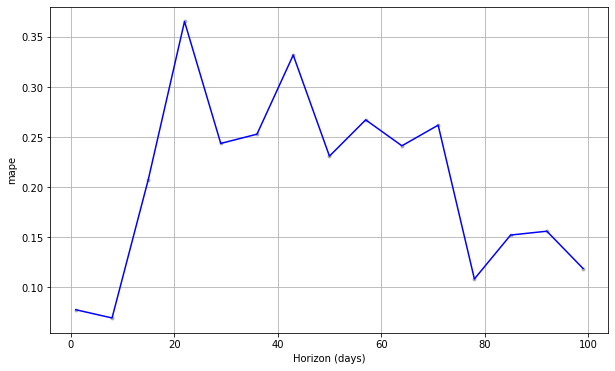

In [88]:
fig = plot_cross_validation_metric(cv_results, metric='mape')

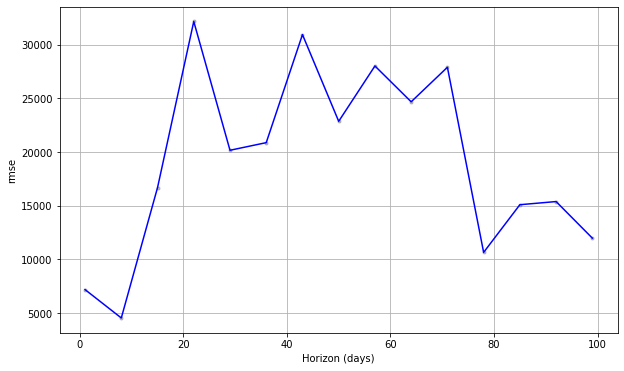

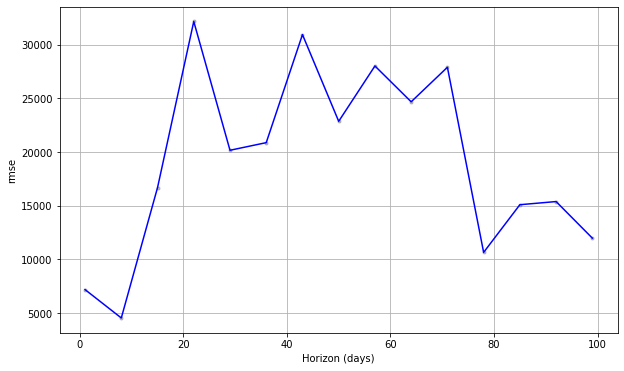

In [91]:
plot_cross_validation_metric(cv_results,metric='rmse')

In [94]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(cv_results['y'],cv_results['yhat'])

20.556623918537305

In [95]:
r2_score(cv_results['y'],cv_results['yhat'])

-2.7617107503712095

Text(0.5, 1.0, 'Prediction Vs Actual')

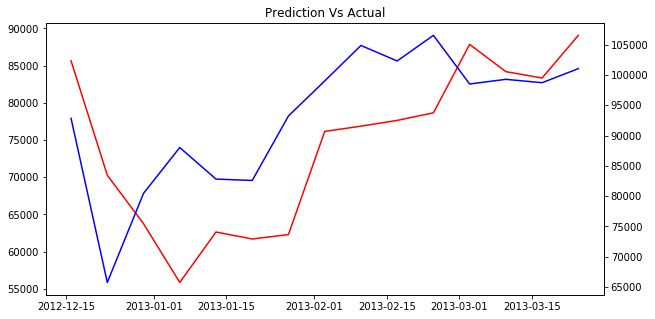

In [96]:
plt.figure(figsize= (10,5))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
ax1.plot(cv_results['ds'],cv_results['yhat'],color = 'r')
ax2.plot(cv_results['ds'],cv_results['y'],color = 'b')
plt.title('Prediction Vs Actual')